<a href="https://colab.research.google.com/github/samyzaf/kerutils/blob/master/poker.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Poker Hand Detection**
## **Database Creators:**
* Robert Cattral (cattral@gmail.com)
* Franz Oppacher (oppacher@scs.carleton.ca)
* Carleton University, Department of Computer Science
Intelligent Systems Research Unit,
1125 Colonel By Drive, Ottawa, Ontario, Canada, K1S5B6  
https://archive.ics.uci.edu/ml/datasets/Poker+Hand  
<img src="https://samyzaf.com/ML/poker/poker0.png" width="50%" />

* The Poker Hand database consists of 1,025,010
  instances of poker hands.
* Each instance is an example of a poker hand consisting of five
  cards drawn from a standard deck of 52 cards.
* Each card is described using two attributes
  (suit and rank), for a total of 10 features.
* There is one Class attribute that describes the Poker Hand.
* The order of cards is important, which is why there
  are 480 possible Royal Flush hands as compared to 4 (one for each
  suit explained in more detail below).

## Feature Information
1. **S1 - Suit of card 1**  
   Ordinal (1-4) representing: Hearts=1, Spades=2, Diamonds=3, Clubs=4  
  <br/>
  <table>
  <tr> <td> 1 <td> heart   <td> <font size=+2 color="red"> ♥ </font> </tr>
  <tr> <td> 2 <td> spade   <td> <font size=+2 color="black"> ♠ </font> </tr>
  <tr> <td> 3 <td> diamond <td> <font size=+2 color="red"> ♦ </font> </tr>
  <tr> <td> 4 <td> club    <td> <font size=+2 color="black"> ♣ </font> </tr>
  </table>  

2. **C1 - Rank of card 1**  
   Numerical (1-13) representing: Ace=1, 2, 3, 4, 5, 6, 7, 8, 9, 10 , Jack=11, Queen=12, King=13

3. **S2 - Suit of card 2**  
   Ordinal (1-4) representing: Hearts=1, Spades=2, Diamonds=3, Clubs=4

4. **C2 - Rank of card 2**  
   Numerical (1-13) representing: Ace=1, 2, 3, 4, 5, 6, 7, 8, 9, 10, Jack=11, Queen=12, King=13

5. **S3 - Suit of card 3**  
   Ordinal (1-4) representing: Hearts=1, Spades=2, Diamonds=3, Clubs=4

6. **C3 - Rank of card 3**  
   Numerical (1-13) representing: Ace=1, 2, 3, 4, 5, 6, 7, 8, 9, 10, Jack=11, Queen=12, King=13

7. **S4 - Suit of card 4**  
   Ordinal (1-4) representing: Hearts=1, Spades=2, Diamonds=3, Clubs=4

8. **C4 - Rank of card 4**  
   Numerical (1-13) representing: Ace=1, 2, 3, 4, 5, 6, 7, 8, 9, 10, Jack=11, Queen=12, King=13

9. **S5 - Suit of card 5**  
   Ordinal (1-4) representing: Hearts=1, Spades=2, Diamonds=3, Clubs=4

10. **C5 - Rank of card 5**  
    Numerical (1-13) representing: Ace=1, 2, 3, 4, 5, 6, 7, 8, 9, 10, Jack=11, Queen=12, King=13

11. **CLASS Poker Hand**  
   Ordinal (0-9)
   ```Python
   0 - Nothing in hand; not a recognized poker hand
   1 - One pair; one pair of equal ranks within five cards
   2 - Two pairs; two pairs of equal ranks within five cards
   3 - Three of a kind; three equal ranks within five cards
   4 - Straight; five cards, sequentially ranked with no gaps
   5 - Flush; five cards with the same suit
   6 - Full house; pair + different rank three of a kind
   7 - Four of a kind; four equal ranks within five cards
   8 - Straight flush; straight + flush
   9 - Royal flush; {Ace, King, Queen, Jack, Ten} + flush
   ```

### **Example**
* The following poker hand will be represented in the
  database by the following 10 features vector:  
  **1, 1, 4, 1, 2, 10, 3, 7, 1, 3**  
  <IMG src="https://samyzaf.com/ML/poker/poker6.jpg" width="50%"/>

In [1]:
%pip install -q https://samyzaf.com/kerutils.zip
from kerutils import *
import pandas as pd
plt.rcParams['figure.figsize'] = (7,6)
# fixed random seed for reproducibility
np.random.seed(0)
%matplotlib inline

features = ['S1', 'C1', 'S2', 'C2', 'S3', 'C3', 'S4', 'C4', 'S5', 'C5', 'CLASS']
data = pd.read_csv('https://samyzaf.com/ML/poker/data/poker-hand-training.csv', names=features)

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done


In [2]:
# Lets view the first 10 rows of the data set
# See bellow what these names mean

data.head(10)

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,CLASS
0,1,10,1,11,1,13,1,12,1,1,9
1,2,11,2,13,2,10,2,12,2,1,9
2,3,12,3,11,3,13,3,10,3,1,9
3,4,10,4,11,4,1,4,13,4,12,9
4,4,1,4,13,4,12,4,11,4,10,9
5,1,2,1,4,1,5,1,3,1,6,8
6,1,9,1,12,1,10,1,11,1,13,8
7,2,1,2,2,2,3,2,4,2,5,8
8,3,5,3,6,3,9,3,7,3,8,8
9,4,1,4,4,4,2,4,3,4,5,8


In [3]:
# How many rows do we have?

len(data.index)

25010

In [4]:
# How many columns do we have?

len(data.columns)

11

In [5]:
# How many records do we have in our data set?

data.size    # 11 * 25010

275110

In [6]:
# You can get everything in one line !

data.shape

(25010, 11)

In [7]:
# View the last 10 records of our data set

data.tail(10)

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,CLASS
25000,2,8,2,12,4,3,4,2,4,4,0
25001,2,12,3,5,3,8,4,1,4,2,0
25002,4,10,2,13,4,5,4,7,1,5,1
25003,1,12,2,9,2,12,4,8,1,13,1
25004,3,5,3,7,4,11,3,11,3,2,1
25005,3,9,2,6,4,11,4,12,2,4,0
25006,4,1,4,10,3,13,3,4,1,10,1
25007,2,1,2,10,4,4,4,1,4,13,1
25008,2,12,4,3,1,10,1,12,4,9,1
25009,1,7,3,11,3,3,4,8,3,7,1


In [9]:
# Some statistics to get acquainted with the data

num_classes = 10  # we have 10 classes of poker hands
cls = {}
for i in range(num_classes):
    cls[i] = len(data[data.CLASS==i])
print(cls)

{0: 12493, 1: 10599, 2: 1206, 3: 513, 4: 93, 5: 54, 6: 36, 7: 6, 8: 5, 9: 5}


In [8]:
# Let's keep a map of poker hand class id to class name
poker_hands = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
hand_name = {
    0: 'Nothing in hand',
    1: 'One pair',
    2: 'Two pairs',
    3: 'Three of a kind',
    4: 'Straight',
    5: 'Flush',
    6: 'Full house',
    7: 'Four of a kind',
    8: 'Straight flush',
    9: 'Royal flush',
}

In [10]:
for i in poker_hands:
    print("%s: %d" % (hand_name[i], cls[i]))

Nothing in hand: 12493
One pair: 10599
Two pairs: 1206
Three of a kind: 513
Straight: 93
Flush: 54
Full house: 36
Four of a kind: 6
Straight flush: 5
Royal flush: 5


* The classes are highly imbalanced,
  which could hamper the training process.
* Our deep learning model will learn a lot about "One Pair" (10599 hands)
  but very little about "Royal Flash" (only 5 hands) !?
* It is usually a good practice to keep this in mind
  and draw a class distribution bar chart
  before you start building and training
  deep learning models.
* The bar chart will give you a thick visual clue regarding imbalance.

Text(0, 0.5, 'Number of instances')

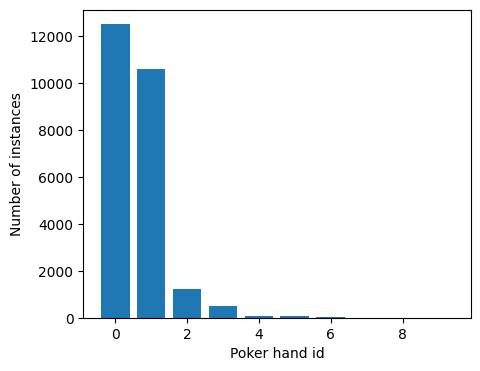

In [12]:
plt.rcParams['figure.figsize'] = (5,4)
plt.bar(poker_hands, [cls[i] for i in poker_hands], align='center')
plt.xlabel('Poker hand id')
plt.ylabel('Number of instances')

### Deep Learning with Keras
* We now proceed to build a neural network using
  Keras for detecting the hand poker
  class from the 10 feature of the 5 cards at hand.
* We will first split our data to the first 10
  predictive features and the last
  CLASS feature will be converted to
  a catogorical form.
* As usuall, [Pandas DataFrames](https://pandas.pydata.org)
  must be converted to Numpy matrices in order to be recognized by Keras.

In [13]:
#  Let's first extract the first 10 features from our data (from the 11 we have)
#  We want to be able to predict the class (hand poker type)

X_train = data.iloc[:,0:10].to_numpy()
y_train = data.iloc[:,10].to_numpy()

In [15]:
# let's look at the first 20 records sample

print(X_train[0:20])
print(y_train[0:20])

[[ 1 10  1 11  1 13  1 12  1  1]
 [ 2 11  2 13  2 10  2 12  2  1]
 [ 3 12  3 11  3 13  3 10  3  1]
 [ 4 10  4 11  4  1  4 13  4 12]
 [ 4  1  4 13  4 12  4 11  4 10]
 [ 1  2  1  4  1  5  1  3  1  6]
 [ 1  9  1 12  1 10  1 11  1 13]
 [ 2  1  2  2  2  3  2  4  2  5]
 [ 3  5  3  6  3  9  3  7  3  8]
 [ 4  1  4  4  4  2  4  3  4  5]
 [ 1  1  2  1  3  9  1  5  2  3]
 [ 2  6  2  1  4 13  2  4  4  9]
 [ 1 10  4  6  1  2  1  1  3  8]
 [ 2 13  2  1  4  4  1  5  2 11]
 [ 3  8  4 12  3  9  4  2  3  2]
 [ 1  3  4  7  1  5  2  4  4 13]
 [ 1  4  1  1  1  3  3  5  3  2]
 [ 3  8  3 12  2  7  2  6  1  2]
 [ 4  8  1 11  4  6  3  2  4 12]
 [ 3  7  2  7  4 11  1 12  3  1]]
[9 9 9 9 9 8 8 8 8 8 1 0 0 0 1 0 4 0 0 1]


## Keras Model Defintion

* Let's start with a simple neural network that consists of
  1. An input layer of 10 neurons
  2. A hidden layer of 16 neurons
  3. An output layer of 10 neurons (one for each poker hand class)

<IMG src="https://samyzaf.com/ML/poker/model1.png" width="45%" align="LEFT"/>
<IMG src="https://samyzaf.com/ML/poker/model1.jpg" width="45%" align="RIGHT" />

In [16]:
# Our first Keras Model
model1 = Sequential()
model1.add(Dense(16, input_shape=(10,), kernel_initializer='uniform', activation='relu'))
model1.add(Dense(10, kernel_initializer='uniform', activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Compiling the model

In [17]:
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

## Training our Model

Keras training method (**fit**) expects one-hot binary vectors as class output.
Hence Keras contains a special utility (**to_categorical**) for converting integer classes to
one-hot binary vectors. One-hot form conversion looks like this:

<pre>
0 -> [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
1 -> [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
2 -> [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
etc.
</pre>

In [18]:
Y_train = to_categorical(y_train)

* We will use 300 epochs and a batch_size of 32.
  We also use our **FitMonitor** callback from our
  [kerutils library](https://samyzaf.com/kerutils.zip).
  which is a more compact progress monitor with intermediate
  summaries after each 10% period.
* The **view_acc** utility is useful for viewing the model training accuracy.

In [19]:
#fmon = FitMonitor()
h = model1.fit(X_train, Y_train, epochs=300, batch_size=64, verbose=1) #, callbacks=[fmon])
# h is a history object that records the fitting process

Epoch 1/300
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4812 - loss: 1.3144
Epoch 2/300
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4880 - loss: 1.0007
Epoch 3/300
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4896 - loss: 0.9879
Epoch 4/300
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4935 - loss: 0.9951
Epoch 5/300
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4992 - loss: 0.9907
Epoch 6/300
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4995 - loss: 0.9891
Epoch 7/300
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4992 - loss: 0.9922
Epoch 8/300
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4956 - loss: 0.9922
Epoch 9/300
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4972 - loss: 0.9887
Epoch 10/300
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4925 - loss: 0.9886
Epoch 11/300
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4989 - loss: 0.9904
Epoch 12/300
391/391 ━━━━━━━━━━━━━━━━━━━━

* Training accuracy of 58% for the first attempt is not too bad.
* The accuracy graph suggests that adding more epochs will
  probably not going to take us to a better accuracy.
* It seems to be stuck around the 58% accuracy level.

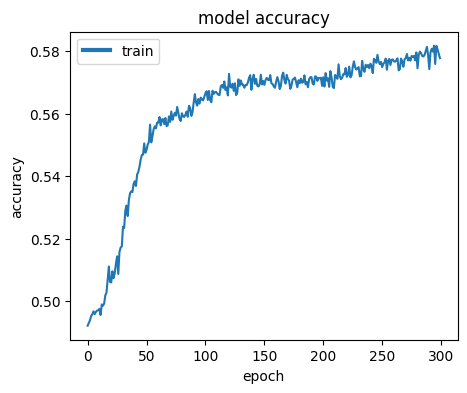

In [20]:
view_accuracy(h)

In [21]:
# Validating the accuracy and loss of our training set

loss, accuracy = model1.evaluate(X_train, Y_train, verbose=0)
print("Train: accuracy=%f loss=%f" % (accuracy, loss))

Train: accuracy=0.582247 loss=0.905862


* Besides the training accuracy, there is also the validation
  accuracy (aka as test accuracy).
* Testing our model on the training data set is not a fair game.
* A good testing ground is a completely different set of samples
  which our model have not already seen.
* Our testing database consists of 1 million new poker hands!
  Let's try them out and see if our model is successful in
  predicting their class, at least at the same accuracy level as 58%.

In [22]:
features = ['S1', 'C1', 'S2', 'C2', 'S3', 'C3', 'S4', 'C4', 'S5', 'C5', 'CLASS']
tdata = pd.read_csv('https://samyzaf.com/ML/poker/data/poker-hand-testing.csv', names=features)

# Checking the success rate on our test set

X_test = tdata.iloc[:,0:10].to_numpy()
y_test = tdata.iloc[:,10].to_numpy()
Y_test = to_categorical(y_test)

loss, accuracy = model1.evaluate(X_test, Y_test, verbose=1)
print("Test: accuracy=%f loss=%f" % (accuracy, loss))

31250/31250 ━━━━━━━━━━━━━━━━━━━━ 70s 2ms/step - accuracy: 0.5786 - loss: 0.9150
Test: accuracy=0.579015 loss=0.915046


* Test accuracy we got is almost identical to our
  training accuracy.
* This is an encouraging indication that our deep
  learning model is doing its work as expected.
* It has been trained on 25,000 samples and gave
  an exact prediction on a totally
  different 1 milion samples!
  This is quite good, so far.
  
* Let's save this model, and proceed to the next one ...

In [23]:
model1.save('model1.keras')

We can get the predictions vectors of our test set in the following way:

In [24]:
x_pred = model1.predict(X_test)
y_pred = np.argmax(x_pred, axis=1)

31250/31250 ━━━━━━━━━━━━━━━━━━━━ 42s 1ms/step


And then count the number of failures

In [25]:
np.count_nonzero(y_pred - y_test)

420985

* We have around 420K false predictions.
* We can save them in a numpy array and analyze them.

In [26]:
false_preds = [(x,y,p) for (x,y,p) in zip(X_test, y_test, y_pred) if y != p]

* Just from looking at the first 20 false predictions we see
  that our model identified "One Pair" hands with
  "Nothing in hand",
  which are very close classes.

In [37]:
for pred in false_preds[0:20]:
  hand, y, p = pred
  print(f"{hand!r:50} {y}   {p}")

array([ 3, 12,  3,  2,  3, 11,  4,  5,  2,  5])    1   0
array([1, 9, 4, 6, 1, 4, 3, 2, 3, 9])              1   0
array([ 1,  4,  3, 13,  2, 13,  2,  1,  3,  6])    1   0
array([ 2,  6,  4, 11,  2,  3,  4,  9,  1,  7])    0   1
array([ 4,  4,  3, 13,  1,  8,  3,  9,  3, 10])    0   1
array([ 4,  7,  3, 12,  1, 13,  1,  9,  2,  6])    0   1
array([ 4,  2,  4, 12,  2, 12,  2,  7,  3, 10])    1   0
array([ 2,  5,  3,  1,  3, 13,  4, 13,  3,  8])    1   0
array([ 2,  8,  4,  6,  1, 12,  2, 13,  1,  8])    1   0
array([ 3,  4,  2,  1,  3, 10,  1,  8,  4,  1])    1   0
array([4, 8, 1, 3, 2, 3, 2, 2, 2, 8])              2   1
array([1, 4, 4, 5, 4, 3, 1, 8, 4, 1])              0   1
array([ 1,  7,  4, 13,  1,  5,  1, 13,  3,  3])    1   0
array([1, 9, 1, 6, 4, 5, 3, 5, 1, 5])              3   1
array([ 1, 10,  1,  6,  3, 13,  3, 11,  3,  9])    0   1
array([ 2, 13,  4,  7,  3, 11,  3, 10,  3,  9])    0   1
array([1, 8, 1, 3, 4, 2, 2, 7, 1, 4])              0   1
array([1, 3, 1, 9, 1, 4, 4, 1, 

## Second Keras Model
* So instead of trying to improve model1 by adding more epochs
  or tuning activity and optimization,
  lets build a new model with one extra hidden layer and with
  more neurons at each layer

In [38]:
model2 = Sequential()
model2.add(Dense(50, input_shape=(10,), kernel_initializer='uniform', activation='relu'))
model2.add(Dense(50, kernel_initializer='uniform', activation='relu'))
model2.add(Dense(num_classes, kernel_initializer='uniform', activation='softmax'))

model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

fmon = FitMonitor(thresh=0.03, minacc=0.99, filename="model1.h5")
h = model2.fit(
    X_train,
    Y_train,
    batch_size=64,
    epochs=200,
    shuffle=True,
    verbose=1,
    #callbacks = [fmon]
)

Epoch 1/200


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.4730 - loss: 1.2650
Epoch 2/200
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4955 - loss: 0.9890
Epoch 3/200
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5062 - loss: 0.9762
Epoch 4/200
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5277 - loss: 0.9795
Epoch 5/200
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5384 - loss: 0.9607
Epoch 6/200
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5433 - loss: 0.9589
Epoch 7/200
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5438 - loss: 0.9597
Epoch 8/200
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5459 - loss: 0.9574
Epoch 9/200
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5565 - loss: 0.9498
Epoch 10/200
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5583 - loss: 0.9327
Epoch 11/200
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5544 - loss: 0.9418
Epoch 12/200
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

Training: accuracy   = 0.842903 loss = 0.382459
Validation: accuracy = 0.829986 loss = 0.415231
Params count: 3610
stop epoch = 199
epochs = 200


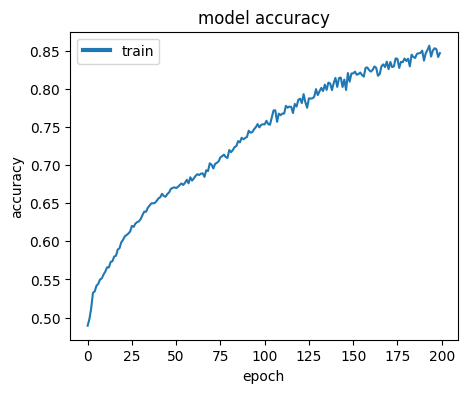

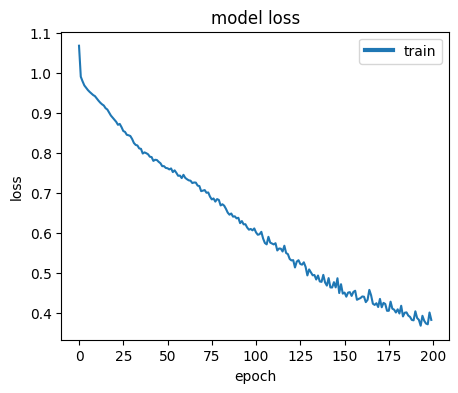

In [39]:
show_scores(model2, h, X_train, Y_train, X_test, Y_test)

* Well, we did some progress from 58% to 84%
* The model accuracy graph suggests that we get higher
  accuracy by adding more epochs.
  Worth trying as an exercise.
* Lets see if we get a similar precision rate on our large validation set.

In [40]:
loss, accuracy = model2.evaluate(X_test, Y_test, verbose=1)
print("Test: accuracy=%f loss=%f" % (accuracy, loss))

31250/31250 ━━━━━━━━━━━━━━━━━━━━ 69s 2ms/step - accuracy: 0.8297 - loss: 0.4156
Test: accuracy=0.829986 loss=0.415231


* This is pretty close and is a strong indication to our model resiliency.
* Lets sample the false predictions and see what our model has missed.

In [41]:
x_pred = model2.predict(X_test)
y_pred = np.argmax(x_pred, axis=1)
false_preds = [(x,y,p) for (x,y,p) in zip(X_test, y_test, y_pred) if y != p]

31250/31250 ━━━━━━━━━━━━━━━━━━━━ 42s 1ms/step


In [42]:
# How many false predictions do we have?
len(false_preds)

170014

In [45]:
# Lets take a look at 20 samples
[(int(a[1]), int(a[2])) for a in false_preds[0:20]]

[(1, 0),
 (0, 1),
 (1, 0),
 (1, 0),
 (1, 0),
 (1, 0),
 (1, 0),
 (1, 0),
 (0, 1),
 (2, 1),
 (1, 0),
 (1, 0),
 (2, 1),
 (0, 1),
 (1, 0),
 (1, 0),
 (1, 0),
 (1, 0),
 (1, 0),
 (5, 0)]

* We see that there are still mismatches between "one pair" and "Nothing at hand",
  but now we also see mismatches between "One pair"
  and "Two pairs", and more.
* We can continue and check more samples, but you get the idea.
* Let's save this model, and proceed to the next one ...

In [46]:
model2.save("model2.keras")

## Third Keras Model
* We will use two hidden layers, with 400 neurons each, and run 500 epochs.

In [47]:
model3 = Sequential()
model3.add(Dense(200, input_shape=(10,), kernel_initializer='uniform', activation='relu'))
model3.add(Dense(400, kernel_initializer='uniform', activation='relu'))
model3.add(Dense(200, kernel_initializer='uniform', activation='relu'))
model3.add(Dense(num_classes, kernel_initializer='uniform', activation='softmax'))

model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

fmon = FitMonitor(thresh=0.03, minacc=0.996, filename="model3.keras")
h = model3.fit(
    X_train,
    Y_train,
    batch_size=64,
    epochs=100,
    shuffle=True,
    verbose=True,
    #callbacks = [fmon]
)

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.4735 - loss: 1.1229
Epoch 2/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4904 - loss: 0.9758
Epoch 3/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5474 - loss: 0.9645
Epoch 4/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5502 - loss: 0.9555
Epoch 5/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5652 - loss: 0.9344
Epoch 6/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5693 - loss: 0.9238
Epoch 7/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5715 - loss: 0.9235
Epoch 8/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5833 - loss: 0.9098
Epoch 9/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5852 - loss: 0.8941
Epoch 10/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6026 - loss: 0.8756
Epoch 11/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6113 - loss: 0.8561
Epoch 12/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

Training: accuracy   = 0.998201 loss = 0.008228
Validation: accuracy = 0.996357 loss = 0.026363
Params count: 164810
stop epoch = 99
epochs = 100


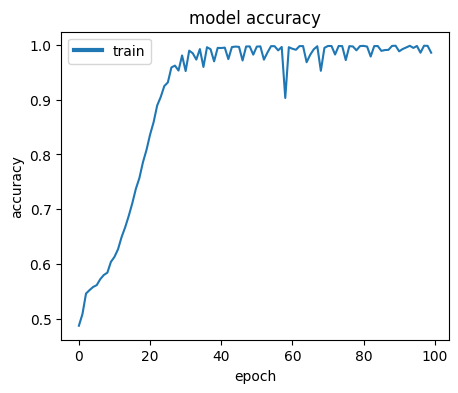

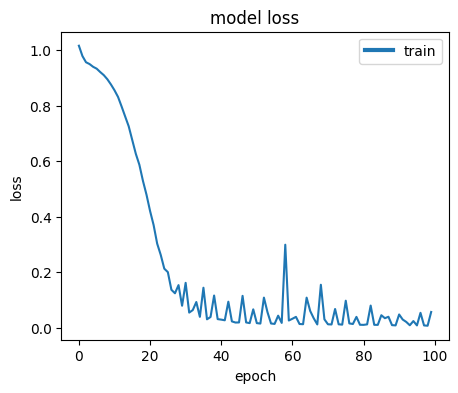

In [48]:
show_scores(model3, h, X_train, Y_train, X_test, Y_test)

In [49]:
# Validating the accuracy and loss of our test set

loss, accuracy = model3.evaluate(X_test, Y_test, verbose=1)
print("Test: accuracy=%f loss=%f" % (accuracy, loss))

31250/31250 ━━━━━━━━━━━━━━━━━━━━ 72s 2ms/step - accuracy: 0.9964 - loss: 0.0266
Test: accuracy=0.996357 loss=0.026363


* Adding more neurons and one more hidden layer did help to get 99.6%
  accuracy level without really hard work from our part.
  All we did is guess a few numbers and parameters (very easy to do)
  and Keras wonderfully produced an efficient clean working model.
  
* It took less that a few minutes (on a good Tesla graphic card)
  to build this network,
  and it potentially saves us one month programmer work
  (are we approaching the end of human programmers? ;-).
  
* From the model accuracy graph it does not look like we
  can do better by running more epochs.

* Let's save this model, and proceed to the next one.

In [50]:
model3.save("model3.keras")

## Fourth Keras Model
* This time we'll throw a lot of neurons on each layer.
* This is however not wise or desired in most cases.
* Large neural networks are prone to be slow and consume much more memory than small ones.
* This is however a matter of trade-offs and we're still experimenting.
  Sometimes high precision is worth the extra weight.

In [52]:
model4 = Sequential()
model4.add(Dense(400, input_shape=(10,), kernel_initializer='uniform', activation='relu'))
model4.add(Dense(800, kernel_initializer='uniform', activation='relu'))
model4.add(Dense(400, kernel_initializer='uniform', activation='relu'))
model4.add(Dense(num_classes, kernel_initializer='uniform', activation='softmax'))

model4.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#fmon = FitMonitor(thresh=0.03, minacc=0.996, filename="model4.keras")
h = model4.fit(
    X_train,
    Y_train,
    epochs=200,
    #batch_size=64,
    #shuffle=True,
    verbose=True,
    #callbacks = [fmon]
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Train begin: 2025-03-23 21:02:53
Stop file: stop_training_file.keras (create this file to stop training gracefully)
Pause file: pause_training_file.keras (create this file to pause training and view graphs)
epochs = 200
steps = 782
verbose = False
.....05% epoch=10, accuracy=0.657217, loss=0.782705, val_accuracy=-1.000000, val_loss=-1.000000, time=28.2 seconds
.....10% epoch=20, accuracy=0.855298, loss=0.364388, val_accuracy=-1.000000, val_loss=-1.000000, time=51.0 seconds
.....15% epoch=30, accuracy=0.960336, loss=0.157682, val_accuracy=-1.000000, val_loss=-1.000000, time=73.5 seconds
.....20% epoch=40, accuracy=0.993083, loss=0.032620, val_accuracy=-1.000000, val_loss=-1.000000, time=96.3 seconds
...


Saving model to model3.h5: epoch=46, accuracy=0.996441, val_accuracy=-1.000000
..25% epoch=50, accuracy=0.988685, loss=0.050919, val_accuracy=-1.000000, val_loss=-1.000000, time=118.9 seconds
...


Saving model to model3.h5: epoch=56, accuracy=0.996921, val_accuracy=-1.000000
.


Saving model to model3.h5: epoch=58, accuracy=0.997241, val_accuracy=-1.000000
.30% epoch=60, accuracy=0.993243, loss=0.024791, val_accuracy=-1.000000, val_loss=-1.000000, time=140.5 seconds
.....35% epoch=70, accuracy=0.988205, loss=0.047002, val_accuracy=-1.000000, val_loss=-1.000000, time=161.4 seconds
.....40% epoch=80, accuracy=0.993922, loss=0.021357, val_accuracy=-1.000000, val_loss=-1.000000, time=183.6 seconds
.


Saving model to model3.h5: epoch=82, accuracy=0.997641, val_accuracy=-1.000000
....45% epoch=90, accuracy=0.987525, loss=0.049120, val_accuracy=-1.000000, val_loss=-1.000000, time=206.2 seconds



Saving model to model3.h5: epoch=91, accuracy=0.997681, val_accuracy=-1.000000
..


Saving model to model3.h5: epoch=95, accuracy=0.998041, val_accuracy=-1.000000
...50% epoch=100, accuracy=0.969652, loss=0.114230, val_accuracy=-1.000000, val_loss=-1.000000, time=228.5 seconds
..


Saving model to model3.h5: epoch=104, accuracy=0.998321, val_accuracy=-1.000000
...55% epoch=110, accuracy=0.986166, loss=0.057344, val_accuracy=-1.000000, val_loss=-1.000000, time=248.0 seconds
.....60% epoch=120, accuracy=0.997761, loss=0.008058, val_accuracy=-1.000000, val_loss=-1.000000, time=268.7 seconds
.....65% epoch=130, accuracy=0.997761, loss=0.008110, val_accuracy=-1.000000, val_loss=-1.000000, time=289.8 seconds
.....70% epoch=140, accuracy=0.991883, loss=0.032093, val_accuracy=-1.000000, val_loss=-1.000000, time=312.6 seconds
.....75% epoch=150, accuracy=0.997481, loss=0.008214, val_accuracy=-1.000000, val_loss=-1.000000, time=334.6 seconds
...


Saving model to model3.h5: epoch=157, accuracy=0.998481, val_accuracy=-1.000000
..80% epoch=160, accuracy=0.991124, loss=0.031903, val_accuracy=-1.000000, val_loss=-1.000000, time=356.9 seconds
.....85% epoch=170, accuracy=0.988445, loss=0.044203, val_accuracy=-1.000000, val_loss=-1.000000, time=379.1 seconds
.....90% epoch=180, accuracy=0.998161, loss=0.007539, val_accuracy=-1.000000, val_loss=-1.000000, time=399.2 seconds
.....95% epoch=190, accuracy=0.998201, loss=0.007200, val_accuracy=-1.000000, val_loss=-1.000000, time=7.05 minutes
....

 99% epoch=199 accuracy=0.998601 loss=0.005241

Saving model to model3.h5: epoch=199, accuracy=0.998601, val_accuracy=-1.000000
Train end: 2025-03-23 21:10:14
Total run time: 7.35 minutes
max_acc = 0.998601  epoch = 199
max_val_accuracy = -1.000000  epoch = -1
Best model saved in file: model3.h5
Checkpoint: epoch=199, accuracy=0.998601, val_accuracy=-1.000000


Training: accuracy   = 0.998601 loss = 0.004494
Validation: accuracy = 0.995350 loss = 0.052929
Params count: 649610
stop epoch = 199
epochs = 200


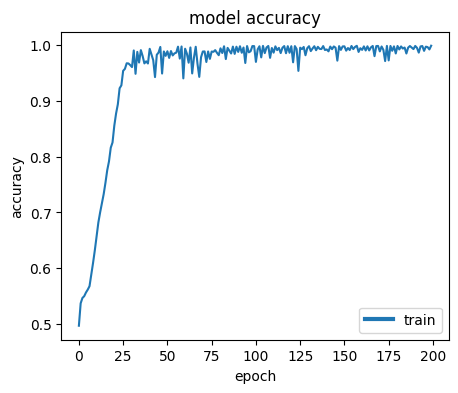

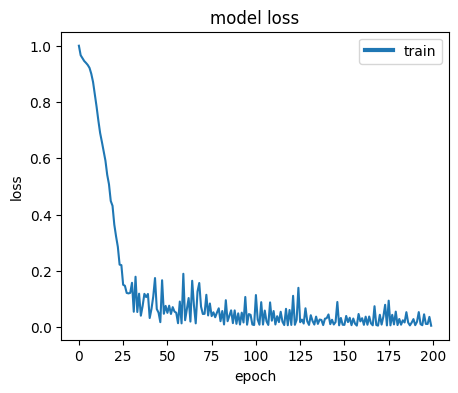

In [53]:
show_scores(model4, h, X_train, Y_train, X_test, Y_test)

In [54]:
model4.save("model4.keras")

In [ ]:
# If you need to save the model on your local disk
# activate this line
#files.download("model4.keras")

In [55]:
# Validating the accuracy and loss of our test set
loss, accuracy = model4.evaluate(X_test, Y_test, verbose=1)
print("Test: accuracy=%f loss=%f" % (accuracy, loss))

31250/31250 ━━━━━━━━━━━━━━━━━━━━ 70s 2ms/step - accuracy: 0.9953 - loss: 0.0536
Test: accuracy=0.995350 loss=0.052929


* Looks like our best achievment so far:
  99.8% training accuracy and 99.6% validation accuracy.
* Now that you've seen enough examples,
  you can get creative and try new models.
* Take into account that Keras offers plenty of activation
  functions, optimizers, and layer types that we
  haven't touched at all.
* So there are literally infinitely many combinations that you can try.
* As this is planned as a course unit, here is an idea for a project
  challenge which is also a kind of fun competition to try.
* I haven't tried it myself though (I may be wrong with this ambition),
  but be glad to see a neat solution if it exists.

## Course Project Challenge
  Find a minimal neural network which adhers to the following requirements:
  1. Produces at least 99.99% accuracy on the training and testing data sets
  2. Number of deep layers does not exceed 8
  3. Number of nuerons at each layer does not exceed 200
  4. Number of training epochs does not exceed 10000
  5. You're not allowed to use any test sample for training!
     (not even one instance ;-)
  6. You will have to submit a full model definition from the
     ground up: layers, compilation, and training methods
* The solution with the smallest number of neurons will
  receive the highest grade,
  and the remaining solutions will receive smaller grades relative
  to their ranking compared to the best solution.